4. 영상의 화질 향상 기법

In [130]:
from google.colab import drive
from google.colab.patches import cv2_imshow
import cv2
import numpy as np
import matplotlib.pyplot as pit
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


히스토그램 평활화 -> 극단적으로 만들어주는것.
히스트그램 스트레칭 -> 개선
평활화 진행시 밀집되어 있던 것을 분산 시켜주는 역할을 함.


(256, 256, 3)


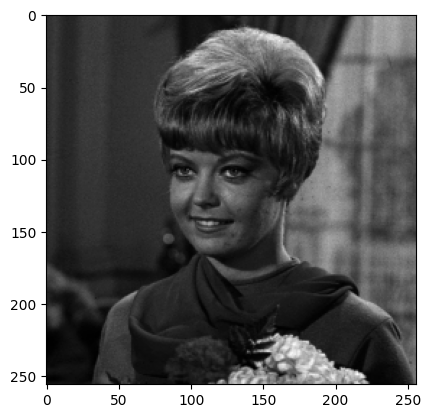

In [131]:
img = cv2.imread('/content/gdrive/My Drive/IP/Images/girl.jpg')
print(img.shape)
gimg = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
pit.imshow (gimg, cmap= 'gray')

In [132]:
outimg = np.zeros(gimg.shape, dtype='uint8')

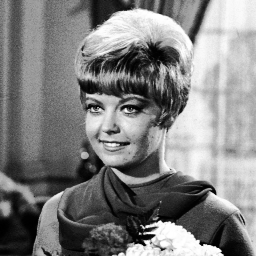

In [133]:
outimg = cv2.equalizeHist(gimg)
cv2_imshow(outimg)

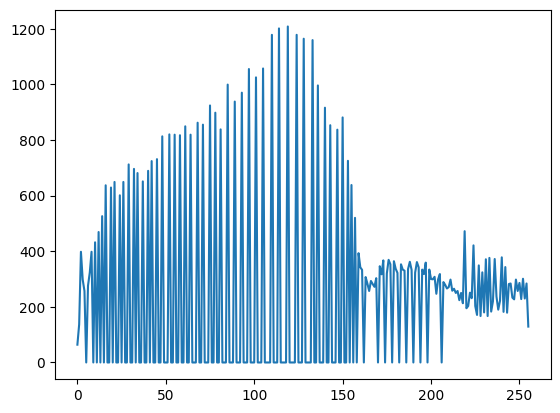

In [134]:
hist = cv2.calcHist([outimg], [0], None, [256], [0,256])
pit.plot(hist)

In [135]:
myHist = np.zeros((256,1), dtype=np.int32)

히스토그램을 만드는 코드

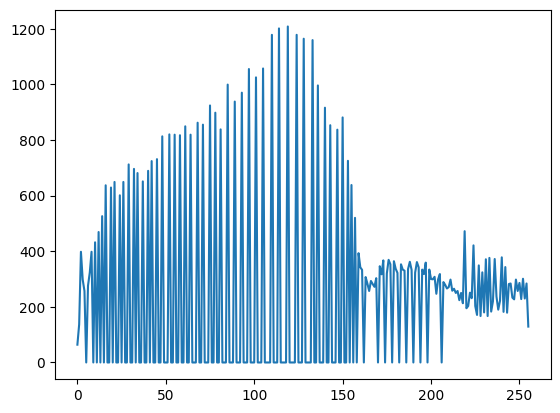

In [136]:
for h in range(gimg.shape[0]):
  for w in range(gimg.shape[1]):
    myHist[outimg[h,w]] += 1

pit.plot(myHist)

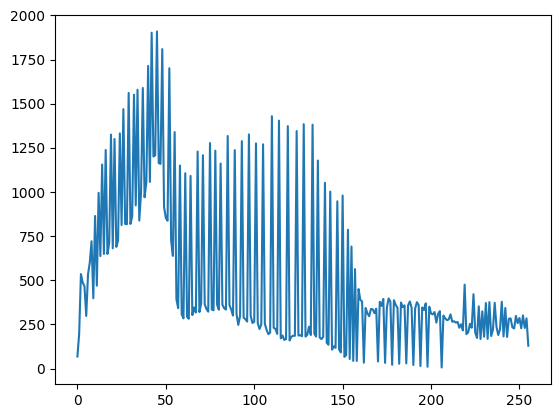

In [137]:
for h in range(gimg.shape[0]):
  for w in range(gimg.shape[1]):
    myHist[gimg[h,w]] += 1

pit.plot(myHist)

In [138]:
cumulHist = np.zeros((256,1), dtype=np.int32)

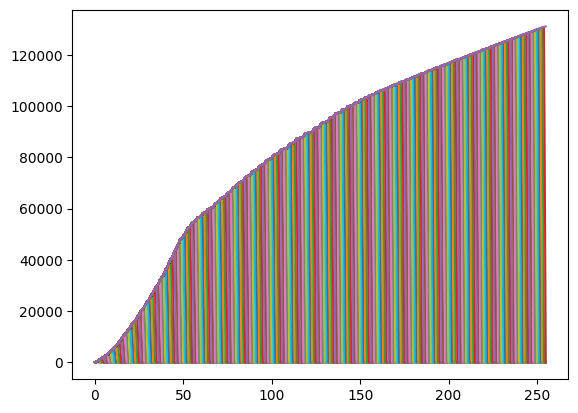

In [139]:
cumulHist[0] = myHist[0]
for i in range(1,256):
  cumulHist[i] = cumulHist[i-1] + myHist[i]

  pit.plot(cumulHist)

히스토그램 평활화 구현 (equalHist)

In [140]:
equalHist = np.zeros((256,1), dtype=np.int32)

cumulHist와 차이점은 y값이 달라짐(모양은 똑같음)

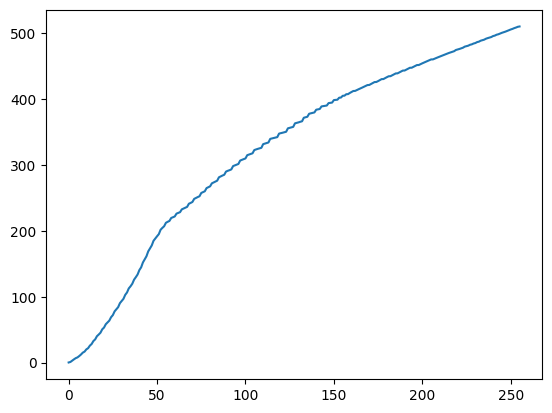

In [141]:
numOfPixel = gimg.shape[0] * gimg.shape[1]
equalHist = cumulHist / numOfPixel
equalHist = equalHist * 255

pit.plot(equalHist)

/tmp/ipython-input-4115978356.py:3: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  outimg[h,w] = equalHist[outimg[h,w]]


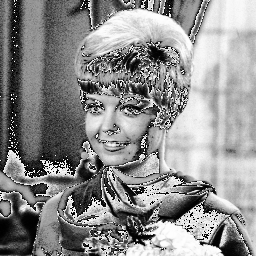

In [142]:
for h in range(gimg.shape[0]):
  for w in range(gimg.shape[1]):
    outimg[h,w] = equalHist[outimg[h,w]]

cv2_imshow(outimg)